In [11]:
import pygeode as pyg
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget
era5_tem_data = pyg.open_multi('/store/ATMOS/shared/era5/*.nc', pattern='e5_$Y_m$m_tem.nc')
era5_u = era5_tem_data.u(year=(1979,1981))
print(era5_u)

<Var 'u'>:
  Shape:  (time02,pres,lat)  (8768,137,181)
  Axes:
    time02 <StandardTime>:  Jan 1, 1979 00:00:00 to Dec 31, 1981 21:00:00 (8768 values)
    pres <Pres>    :  0.015 hPa to 1012 hPa (137 values)
    lat <Lat>      :  90 N to 90 S (181 values)
  Attributes:
    long_name      : U velocity                                                 
    units          : m s**-1                                                    
  Type:  SlicedVar (dtype="float64")


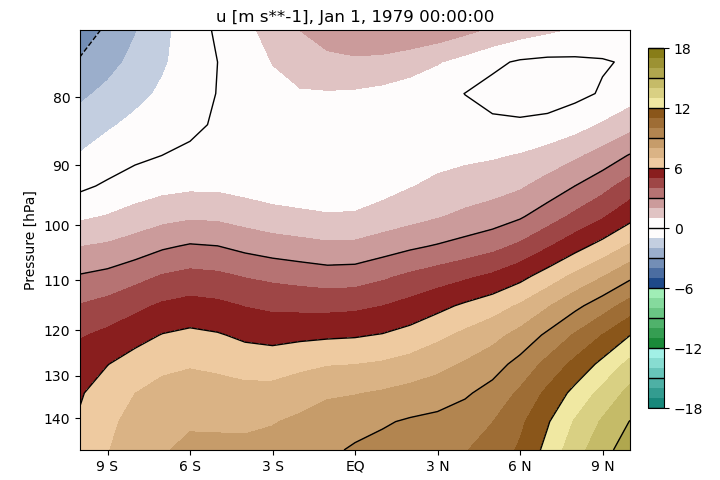

In [3]:
pyg.showvar(era5_u(pres=(70,150), lat=(-10,10),  i_time=0))

In [4]:
H = 7e3
z = pyg.Height(-H *np.log(era5_u.pres[:]/1e3))
era5_u_in_z = era5_u.replace_axes(pres=z)

In [5]:
print(era5_u_in_z.monthlymean())

<Var 'u_monthly_mean'>:
  Shape:  (time,z,lat)  (522,137,181)
  Axes:
    time <StandardTime>:  Jan , 1979 :: to Jun , 2022 :: (522 values)
    z <Height>     :  77750 m to -83 m (137 values)
    lat <Lat>      :  90 N to 90 S (181 values)
  Attributes:
    long_name      : U velocity                                                 
    units          : m s**-1                                                    
  Type:  monthlymean (dtype="float64")


In [6]:
du = (era5_u_in_z.monthlymean() )

In [18]:
print(era5_u.climatology())

<Var 'u_clim_mean'>:
  Shape:  (time,pres,lat)  (2928,137,181)
  Axes:
    time <StandardTime>:  Jan 1,  00:00:00 to Dec 31,  21:00:00 (2928 values)
    pres <Pres>    :  0.015 hPa to 1012 hPa (137 values)
    lat <Lat>      :  90 N to 90 S (181 values)
  Attributes:
    long_name      : U velocity                                                 
    units          : m s**-1                                                    
  Type:  climatology (dtype="float64")


In [19]:
print(du(lat=(-5,5)))

<Var '(u_monthly_mean-u_monthly_mean_clim_mean)'>:
  Shape:  (time,z,lat)  (522,137,11)
  Axes:
    time <StandardTime>:  Jan , 1979 :: to Jun , 2022 :: (522 values)
    z <Height>     :  77750 m to -83 m (137 values)
    lat <Lat>      :  5 N to 5 S (11 values)
  Attributes:
    long_name      : U velocity                                                 
    units          : m s**-1                                                    
  Type:  SlicedVar (dtype="float64")


In [24]:
u_clim = pyg.climatology(era5_u.monthlymean())
u_monthly = era5_u.monthlymean()
du = (u_monthly-u_clim).load()

Loading <Var '(u_monthly_mean-u_monthly_mean_clim_mean)'>: 75%| |ETA:   0:00:05

ValueError: operands could not be broadcast together with shapes (12,) (36,) 

Loading <Var 'u_monthly_mean_clim_mean'>:100%|##################|Time:  0:00:16


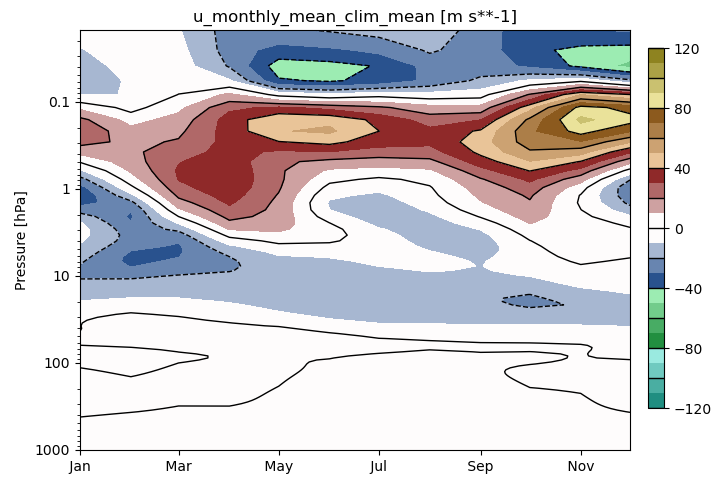

In [14]:
pyg.showvar(du)

Loading <Var 'u_monthly_mean'>:100%|############################|Time:  0:00:16


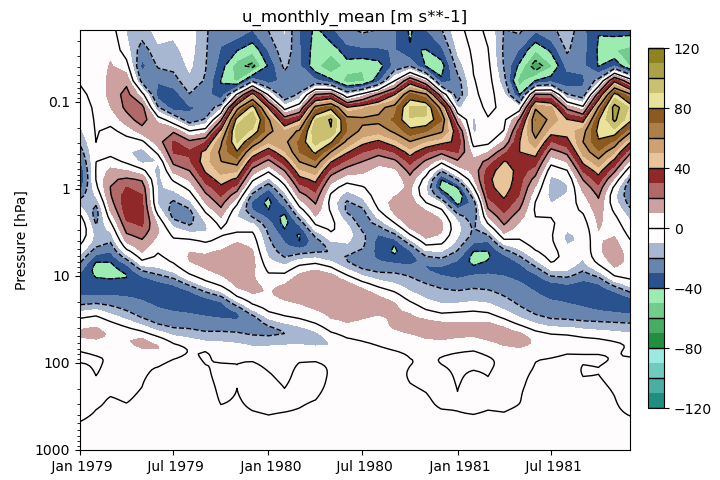

In [15]:
pyg.showvar(era5_u(lat=(-5,5)).monthlymean().mean(pyg.Lat))

In [17]:
du1 = du(lat=(-5,5))
du_mean = du1.mean(pyg.Lat)
print(du_mean)

<Var '(u_monthly_mean-u_monthly_mean_clim_mean)'>:
  Shape:  (time,pres)  (36,137)
  Axes:
    time <StandardTime>:  Jan , 1979 :: to Dec , 1981 :: (36 values)
    pres <Pres>    :  0.015 hPa to 1012 hPa (137 values)
  Attributes:
    long_name      : U velocity                                                 
    units          : m s**-1                                                    
  Type:  WeightedMeanVar (dtype="float64")


In [18]:
pyg.showvar(du_mean)

Loading <Var '(u_monthly_mean-u_monthly_mean_clim_mean)'>: 36%| |ETA:   0:00:26

ValueError: operands could not be broadcast together with shapes (12,) (36,) 

In [19]:
%debug

> /home/cwp29/anaconda/envs/python/lib/python3.11/site-packages/pygeode/view.py(236)<genexpr>()
    234     # Only request unique elements from the input
    235     unique_indices = [np.unique(ind) for ind in newview.integer_indices]
--> 236     if all(np.all(u == ind) for u,ind in zip(unique_indices, newview.integer_indices)):
    237       # already unique
    238       duplicator = ()



ipdb>  u


> /home/cwp29/anaconda/envs/python/lib/python3.11/site-packages/pygeode/view.py(236)get()
    234     # Only request unique elements from the input
    235     unique_indices = [np.unique(ind) for ind in newview.integer_indices]
--> 236     if all(np.all(u == ind) for u,ind in zip(unique_indices, newview.integer_indices)):
    237       # already unique
    238       duplicator = ()



ipdb>  u


> /home/cwp29/anaconda/envs/python/lib/python3.11/site-packages/pygeode/ufunc.py(99)getview()
     97     for I,i in enumerate(self.ivars):
     98       # For each variable, get appropriate subranges, reshape, and transpose array
---> 99       args[i] = view.get(args[i], pbar=pbar.subset(prog[I],prog[I+1]))
    100       # Fix for 0-dimensions variables, which will return a scalar
    101       args[i] = np.array(args[i])



ipdb>  d


> /home/cwp29/anaconda/envs/python/lib/python3.11/site-packages/pygeode/view.py(236)get()
    234     # Only request unique elements from the input
    235     unique_indices = [np.unique(ind) for ind in newview.integer_indices]
--> 236     if all(np.all(u == ind) for u,ind in zip(unique_indices, newview.integer_indices)):
    237       # already unique
    238       duplicator = ()



ipdb>  u


> /home/cwp29/anaconda/envs/python/lib/python3.11/site-packages/pygeode/ufunc.py(99)getview()
     97     for I,i in enumerate(self.ivars):
     98       # For each variable, get appropriate subranges, reshape, and transpose array
---> 99       args[i] = view.get(args[i], pbar=pbar.subset(prog[I],prog[I+1]))
    100       # Fix for 0-dimensions variables, which will return a scalar
    101       args[i] = np.array(args[i])



ipdb>  u


> /home/cwp29/anaconda/envs/python/lib/python3.11/site-packages/pygeode/view.py(262)get()
    260       # Can we use the progress bar?
    261       if 'pbar' in var.getview.__code__.co_varnames:
--> 262         values = var.getview(unique_view, pbar=pbar)
    263       else:
    264         print('no pbar in', type(var))



ipdb>  u


> /home/cwp29/anaconda/envs/python/lib/python3.11/site-packages/pygeode/varoperations.py(533)getview()
    531   def getview (self, view, pbar):
    532   # {{{
--> 533     return view.get(self.var, pbar=pbar)
    534   # }}}
    535 # }}}



ipdb>  u


> /home/cwp29/anaconda/envs/python/lib/python3.11/site-packages/pygeode/view.py(262)get()
    260       # Can we use the progress bar?
    261       if 'pbar' in var.getview.__code__.co_varnames:
--> 262         values = var.getview(unique_view, pbar=pbar)
    263       else:
    264         print('no pbar in', type(var))



ipdb>  u


> /home/cwp29/anaconda/envs/python/lib/python3.11/site-packages/pygeode/tools.py(446)loopover()
    444       # See https://github.com/pygeode/pygeode/issues/59
    445       try:
--> 446         data.append(inv.get(v, pbar=vpbar))
    447       except StopIteration:
    448         raise Exception ("Stray StopIteration signal caught.  Unable to retrieve the data.")



ipdb>  u


> /home/cwp29/anaconda/envs/python/lib/python3.11/site-packages/pygeode/reduce.py(287)getview()
    285     out = np.zeros(view.shape, self.dtype)
    286     W = np.zeros(view.shape, self.dtype)
--> 287     for outsl, (indata, inw) in loopover([self.var, self.mweights], view, self.var.axes, pbar=pbar):
    288       out[outsl] += npsum(indata * inw, self.indices)  # Product of data and weights
    289       f = indata.size / (inw.size * out[outsl].size)



ipdb>  print(self.var)


<Var '(u_monthly_mean-u_monthly_mean_clim_mean)'>:
  Shape:  (time,pres,lat)  (36,137,11)
  Axes:
    time <StandardTime>:  Jan , 1979 :: to Dec , 1981 :: (36 values)
    pres <Pres>    :  0.015 hPa to 1012 hPa (137 values)
    lat <Lat>      :  5 N to 5 S (11 values)
  Attributes:
    long_name      : U velocity                                                 
    units          : m s**-1                                                    
  Type:  SlicedVar (dtype="float64")


ipdb>  exit


In [ ]:
pyg.showvar(du(lat=(-5,5),month=7,height=(0,20000)).mean(pyg.Lat).mean(pyg.TAxis))

In [13]:
pyg.showvar(du(lat=(-5,5),month=7,height=(0,20000)).mean(pyg.Lat).mean(pyg.TAxis).deriv(pyg.Height))

Loading <Var 'd(u_monthly_mean-u_monthly_mean_clim_mean)'>: 47%||ETA:   0:00:21

ValueError: operands could not be broadcast together with shapes (43,) (85,) 